# 有监督学习
## 线性模型
    OLS、Ridge、Lasso
## 随机梯度下降SGD
## 支持向量机SVM
## 朴素贝叶斯Nativ Bayes
    GaussianNB、BernoulliNB
## 高斯过程Gaussian Process
## 决策树Decision Tree
## 集成学习 Ensemble Learning
    随机森林、自适应增强

In [1]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

ndim= 1     b= 1.621485039374797 
w= [-0.44727631]
ndim= 4     b= -5.046248169403487 
w= [-3.36275513  9.30374794 -4.30722338  0.89171014]
ndim= 7     b= -3710.967932429334 
w= [ -1398.36520502  10976.26547093 -18125.53813233  20748.75102072
 -14657.59717864   5766.333206     -967.23867168]
ndim= 10     b= 3396758.208275023 
w= [ 8.36600326e+05 -2.12538254e+07  9.30770375e+07 -2.73873459e+08
  5.29364475e+08 -6.79318724e+08  5.74810968e+08 -3.08787671e+08
  9.55836366e+07 -1.30001152e+07]


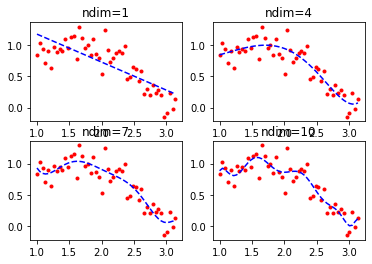

In [8]:

# 线性回归

# 最小二乘法OLS

x = np.linspace(1, np.pi, 50)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

# 行堆叠
x_p = np.vstack([[x, ], [i**x for i in range(2, 13)]]).T

# 维数增多时过拟合现象
i = 1
for ndim in range(1, 12, 3):
    plt.subplot(2, 2, i)
    reg = linear_model.LinearRegression()
    reg.fit(x_p[:, :ndim], y)
    print('ndim=', ndim, "    b=", reg.intercept_, '\nw=', reg.coef_)
    yp = reg.predict(x_p[:, :ndim])
    plt.plot(x, y, 'r.', x, yp, 'b--')
    plt.title('ndim=%s' % ndim)
    i += 1

# 岭回归 L2=αΣw² 可减小过拟合 Ridge Regression
reg = linear_model.Ridge(alpha=0.01)

# Lasso回归 L1 = αΣabs(w) 可将不重要的参数减为0实现压缩
reg = linear_model.Lasso(alpha=0.01)

b= [0.97850085] 
w= [1.92249905]


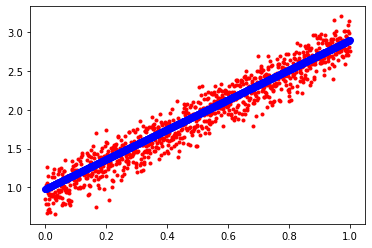

In [10]:
# 梯度下降

x = np.linspace(0, 1, 1000)
y = x * 2 + 0.9 + np.random.normal(0, 0.15, len(x))
x = x.reshape(-1, 1)

# 回归
reg = linear_model.SGDRegressor(penalty='l1', loss='squared_loss', learning_rate='optimal', tol=1e-15)

# 增量学习
i = list(range(len(y)))
for _ in range(10000):
    random.shuffle(i)
    reg.partial_fit(x[(i[:10])], y[(i[:10])])
yp = reg.predict(x)
print("b=", reg.intercept_, '\nw=', reg.coef_)
plt.plot(x, y, 'r.', x, yp, 'bo')

# 分类
clf = linear_model.SGDClassifier(penalty='l2', max_iter=100)

In [11]:
# 支持向量机SVM 超平面分类问题

from sklearn import svm
x = np.array([[0, 0], [2, 2]])
y = [1, 2]
clf = svm.SVC(kernel='rbf')
clf.fit(x, y)
clf.predict([[-1, 2], [-1, 0]])

array([1, 1])

## 朴素贝叶斯(naive bayes)分类      
    "朴素"即假设n维数据之间相互独立，故计算联合分布时可以简化为计算各特征独自的条件概率
    P(A|B)=P(B|A)*P(A)/P(B)
    P(A|B)是后验概率，P(A)为先验概率，P(B|A)为似然度，P(B)为标准化常量
    用贝叶斯公式计算在给定特征情况下出现的每一个标签的后验概率，预测值为获得最高后验概率的标签。在计算的过程中需要学习似然度参数，即假定n维特征符合某种联合分布，根据样本估计该分布的参数。对于高斯分布来说需要学习期望值和方差。

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

#  高斯朴素贝叶斯

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)

# 三种标签先验概率
print('p=', gnb.class_prior_)

# 每种标签数量
print('count=', gnb.class_count_)

# 模型期望值
print('u=', gnb.theta_)

# 模型方差
print('σ=', gnb.sigma_)

gnb.predict(iris.data) == iris.target


## 伯努利朴素贝叶斯    二值分布，需要一个阈值binarize将特征转化为二值类型

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=1)

p= [0.33333333 0.33333333 0.33333333]
count= [50. 50. 50.]
u= [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
σ= [[0.121764 0.140816 0.029556 0.010884]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


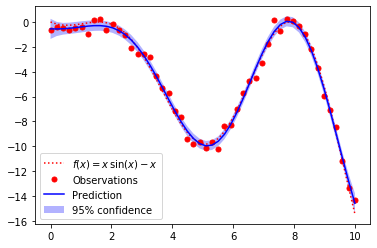

In [272]:
## 高斯过程

# gaussian_process工具包

from sklearn.gaussian_process import GaussianProcessRegressor                # 回归
from sklearn.gaussian_process.kernels import RBF, Product, ConstantKernel as C

# 原函数
f = lambda x: x * np.sin(x) - x

x = np.linspace(0, 10, 50)
y = f(x) + np.random.normal(0, 0.5, x.shape[0])    # 加入噪声
x_t = np.linspace(0, 10, 500)

# 定义两个核函数， 并求积
kernel = Product(C(0.1), RBF(10, (1e-2, 1e2)))

# 初始化模型：核函数、优化次数、噪声系数
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3, alpha=0.3)
gp.fit(x.reshape(-1, 1), y)
yp, sigma = gp.predict(x.reshape(-1, 1), return_std=True)

# 绘制结果 np.concatenate()对数组进行扩充，默认对axis=0轴进行扩充
fig = plt.figure()
plt.plot(x_t, f(x_t), 'r:', label=u'$f(x) = x\, \sin(x)-x$')
plt.plot(x, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, yp, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]), np.concatenate([yp-2*sigma, (yp+2*sigma)[::-1]]), alpha=.3, fc='b', label='95% confidence')
plt.legend(loc='lower left')


In [13]:
## 决策树 信息熵entropy=-ΣP*log2（P）， 基尼指数gini=1-ΣP²
# 建树策略：递归寻找特征使得按该特征划分数据后所得的信息增益最大

from sklearn import tree

# 信息熵分类器   ’gini‘为基尼指数
clf = tree.DecisionTreeClassifier(criterion="entropy")     # 信息熵分类器   ’gini‘为基尼指数
clf.fit(iris.data[::2], iris.target[::2])

# 特征重要性 可以看出主要和后两个特征有关
print(clf.feature_importances_)

sum(clf.predict(iris.data) == iris.target)/len(iris.target)


# tree.DecisionTreeRegressor() # 回归

[0.         0.02729917 0.65399389 0.31870693]


0.98

## 集成学习Ense Learning
### Bagging Method
    若干个基模型在若干个训练子集上进行相互独立的分别训练，在预测时一次性综合所有结果
    随机森林Random Forrest：有放回采样bootstrap，OOB(Out-of-Bag Estimation)指基模型的预测评估只采用未参与到其本身训练的数据集,基模型为决策树
### Boosting Method
    按迭代的顺序逐个训练基模型，在每次训练后都进行模型测试，然后根据测试结果调整下一轮基模型训练时所采用的训练数据，最后预测时仍然综合所有结果
    自适应增强Adaptive Boosting， 基模型默认决策树，可以自己选
### 偏差bias与方差variance
    有监督学习可以归结为对这两种错误的最小化问题，通过高斯分布将预测错误拟合，得到N(u,σ²)，其中u可以理解为bias，σ²是variance，bias对应的是拟合不足的问题，variance对应的是过度拟合，两者相互矛盾，而集成学习就是通过对多个弱模型偏差平均，由于单个模型偏差有正负，故能降低偏差绝对值，从而在不较大影响方差的前提下找到一个更好的最优错误偏差。

In [14]:
## Random Forrest

from sklearn.ensemble import RandomForestClassifier

# 基模型数量、有放回采样、oob评估
clf = RandomForestClassifier(n_estimators=20, bootstrap=True, oob_score=True)

clf.fit(iris.data[::2], iris.target[::2])

# 只在oob_score=True时有值
print('rf=', clf.oob_score_)

# sum(clf.predict(iris.data) == iris.target) / len(iris.target)

## Adaptive Boosting 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle     # 随机

x, y = shuffle(iris.data, iris.target)

clf = AdaBoostClassifier(base_estimator=GaussianNB())
clf.fit(x[:-20], y[:-20])

print('ab=', clf.score(x[-20:], y[-20:]))

rf= 0.9466666666666667
ab= 1.0


In [15]:
## 自动超参数调试

from sklearn.model_selection import GridSearchCV

# 待调试参数列表
tuned_parameters = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C':[1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
                   ]
# 初始化              待调试模型        模型超参数列表      交叉验证的N-fold   评估指标
clf = GridSearchCV(estimator=svm.SVC(), param_grid=tuned_parameters, cv=10, scoring='accuracy')

clf.fit(iris.data, iris.target)

# 打印最后结果
print('Best parameters set found on development set:')
print(clf.best_estimator_, '\n', clf.best_params_)

Best parameters set found on development set:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


## 参数学习与非参数学习
### 参数学习
    学习之前假设函数的形式，然后学习最优化函数中的参数，如线性模型、二次模型
### 非参数学习
    无须定义函数形式，由数据自动学习可能的映射关系， 大部分都是非参数学习，包括朴素贝叶斯、高斯过程、决策树、集成学习等

## SVM多目标检测
    由于SVM通过超平面进行分类，只能区分两种目标类，有两种策略让其支持多目标检测，假设为m
### One-vs-All
    为每一个目标值建立一个自己的分类器，在预测阶段采用最强烈的确定是否为目标的结果，共需要m个二值分类器，每个分类器在分类时需要用到所有数据，适用于在性能上对样本数量不是很敏感的模型
### One-vs-One
    两两目标值类型建立一个二值分类器，每个分类器只采用与之相关的两种数据做训练，在预测阶段需要争对每个目标类型收集相关分类器的结果，选择最强烈的作为最后结果，共需要m×（m-1）/ 2个分类器，适用于在性能上对样本数量敏感的模型，一般弱于One-vs-All